In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [8]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

### Long/ Lat of locations

In [79]:
long_lat = {
    "Nazare":(39.60643329877418, -9.069326904868202),
    "Pipeline":(21.66229218907463, -158.05404584198783),
    "Mundaka": (43.407279509660334, -2.696307768145146),
    "El-Fronton":(28.165834204443097, -15.653935260577295),
    "The-Box":(-33.975224497763136, 114.98623551043566),
    "Puerto-Escondido":(15.870470458529073, -97.10501936944054),
    "Itacoatiara":(-3.1487265601215007, -58.44722723892887),
    "Padang-Padang":(-8.810859934998652, 115.10375528598694),
    "Kirra":(-28.165579598130922, 153.52863458141658)
       
}

In [2]:
data = pd.read_csv (r'Full_clean_df.csv')

In [3]:
data

,Spot,date,time,range,height_ft,swell_dir,swell_angle,period_sec,wind_kmh,wind_dir,wind,wind_angle,temp_°c,Conditions
0,Nazare,01/01,6am,7-11ft,5.0,NW,306,11,4,ESE,Offshore,115,6,Good
1,Nazare,01/01,12pm,7-11ft,5.0,NW,310,10,6,SE,Offshore,144,13,Good
2,Nazare,01/01,6pm,6-10ft,4.5,NW,309,10,1,S,Offshore,171,8,Good
3,Nazare,02/01,6am,4-7ft,2.5,NW,322,10,6,SE,Offshore,129,6,Good
4,Nazare,02/01,12pm,5-8ft,3.0,W,276,12,9,SSE,Offshore,156,11,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,Tauro,30/12,12pm,1ft,0.6,SSW,203,13,4,SSE,Cross/Onshore,154,18,Epic
10976,Tauro,30/12,6pm,1ft,0.7,SSW,203,13,2,SW,Onshore,228,18,Epic
10977,Tauro,31/12,6am,1-2ft,0.9,SSW,202,12,5,N,Offshore,349,17,Epic
10978,Tauro,31/12,12pm,1-2ft,1.0,SSW,203,12,3,SSW,Onshore,207,19,Epic


In [47]:
data.Spot.value_counts()

Nazare              1098
Pipeline            1098
Fronton             1098
The Box             1098
Puerto Escondido    1098
Itacoatiara         1098
Padang-Padang       1098
Mundaka             1098
Mosca Point         1098
Tauro               1098
Name: Spot, dtype: int64

In [57]:
nazare = data[(data.Spot == "Nazare")]

In [58]:
fronton = data[(data.Spot == "Fronton")]

In [59]:
mundaka = data[(data.Spot == "Mundaka")]

In [60]:
mosca_point = data[(data.Spot == "Mosca Point")]

### Here i want to plot the evolution of wave height throughout the year of spots from different parts of the world
- Pipeline
- Padang-Padang
- El Fronton
- Puerto Escondido


TypeError: line() got an unexpected keyword argument 'ax'

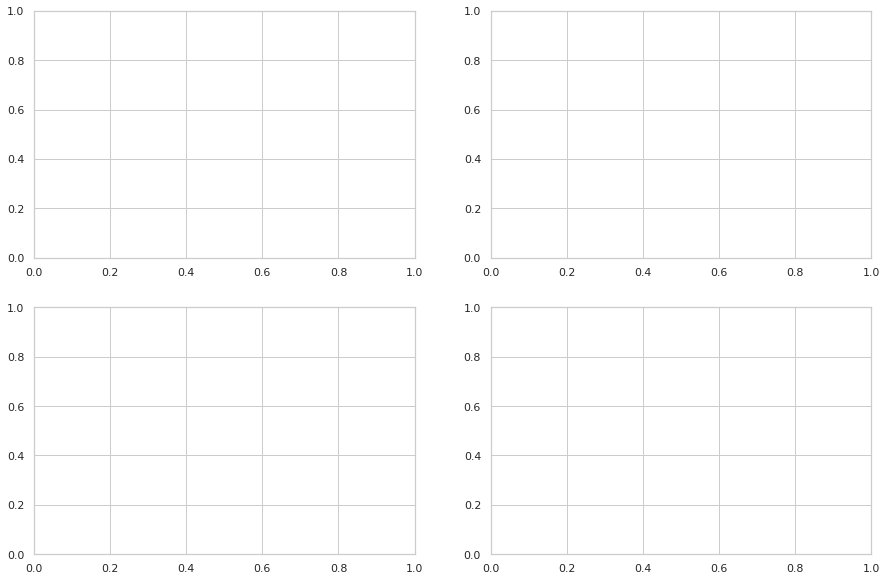

In [77]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
px.line(nazare,x="date", y="height_ft", color="Spot",title="Wave height",ax=axs[0,0]),
fig.update_xaxes(nticks=12)

In [62]:
data.groupby(["Spot"])["sex"].count().unstack().plot(kind="barh", ax=axs[0,0])
"""sns.violinplot(x =penguins.bill_length_mm, y=penguins.species,ax=axs[0,1])
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=axs[0,2])
sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=axs[1,0])
atos.plot.pie(autopct="%.1f%%",ax=axs[1,1])
sns.countplot(x=penguins.sex, ax=axs[1, 2])"""

KeyError: 'Column not found: sex'

### Basic graphs

NEED to make lineplot visually more appealable... better colours and larger Y axis

In [82]:
fig = px.line(data,x="date", y="height_ft", color="Spot",title="Wave height")
fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=25)
fig.show()

Example of compass type barchart... need to create two for each spot... one for wind direction and another for wave direction

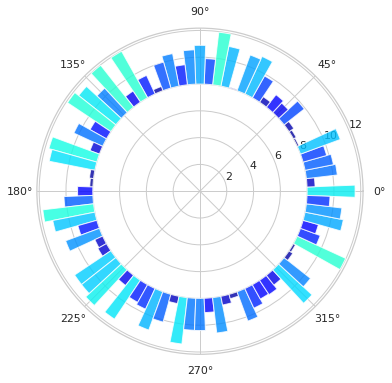

In [38]:
N = 80
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = max_height*np.random.rand(N)
width = (2*np.pi) / N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

### Interactive map

Interactive map to be able to scroll through time series and show "epic", "good" spots for every season

In [ ]:
fig = px.scatter_geo(df_earthquakes,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Year",
                        #color = "Mag_cat",
                        opacity = 0.5, 
                        #size = "Magnitude",
                        animation_frame=df_earthquakes["Year"]
                        )
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()